# Часть 1
### Cоздание массива данных

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%pylab inline
np.random.seed(123)

Populating the interactive namespace from numpy and matplotlib


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_excel('dataset_3.xlsx')
df

,№,Наименование,Год,"Возраст компании, лет",Статус,Организационно-правовая форма,Форма собственности,"Оборотные активы, RUB","Активы всего, RUB","Нераспределенная прибыль (непокрытый убыток), RUB","Долгосрочные обязательства, RUB","Краткосрочные обязательства, RUB","Совокупный долг, RUB","Выручка, RUB",Коэффициент оборачиваемости совокупных активов,Оборотные активы/ТА,Нераспределенная прибыль (непокрытый убыток)/ТА,Долгосрочные обязательства/ТА,Краткосрочные обязательства/ТА,Совокупный долг/ТА,Выручка/ТА,Гос собственность,Частичная,Частная,АО,Гос собственность.1,Сельское хозво,Неком,Кооперативы,ООО
0,1,"(ТУЛАТЕХМАШ), АО",19,29.0,1,0,0,192345000,228294000,-32949000,93533000,158381000,251914000,36594000,0.1425,0.842532,-0.144327,0.409704,0.693759,1.103463,0.160293,0,0,1,1,0,0,0,0,0
1,2,"18 ЦАРЗ, АО",19,11.5,1,0,2,79057000,507607000,-375469000,9007000,466916000,475923000,2173000,0.0041,0.346295,-1.644673,0.039454,2.045240,2.084693,0.009518,0,1,0,1,0,0,0,0,0
2,3,"39 АРСЕНАЛ, АО",19,26.5,1,0,1,209931000,286396000,-199177000,168000,456867000,457035000,44035000,0.1531,0.919564,-0.872458,0.000736,2.001222,2.001958,0.192887,1,0,0,1,0,0,0,0,0
3,4,"94 АРЗ, АО",19,25.5,1,0,1,10463000,233053000,-175760000,1195000,218191000,219386000,3757000,0.0166,0.045831,-0.769884,0.005234,0.955746,0.960980,0.016457,1,0,0,1,0,0,0,0,0
4,5,"АБСОЛЮТ, ООО",19,27.0,1,5,0,63009000,160632000,-78300000,6471000,206861000,213332000,2461000,0.0129,0.275999,-0.342979,0.028345,0.906117,0.934462,0.010780,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19661,19662,"4ФРЭШ, ООО",20,1.5,0,5,0,151849000,166295000,14723000,144000,151378000,151522000,771586000,5.3344,0.665147,0.064491,0.000631,0.663084,0.663714,3.379791,0,0,1,0,0,0,0,0,1
19662,19663,"(КОЛХОЗ) ИМЕНИ ШЕВЧЕНКО, СПК",20,28.0,0,2,0,222633000,472009000,363265000,75981000,8769000,84750000,311983000,0.7227,0.975203,1.591216,0.332821,0.038411,0.371232,1.366584,0,0,1,0,0,1,0,0,0
19663,19664,"ТЭС, АО",20,10.5,1,0,0,79877000,87991000,-21156000,1000,108074000,108075000,17238000,0.1468,0.349887,-0.092670,0.000004,0.473398,0.473403,0.075508,0,0,1,1,0,0,0,0,0
19664,19665,"СФЕРА УПАКОВКИ, ООО",20,5.0,1,5,0,168824000,168824000,4711000,2059000,161944000,164003000,121213000,0.6894,0.739503,0.020636,0.009019,0.709366,0.718385,0.530951,0,0,1,0,0,0,0,0,1


Удаляем пустые значения

In [5]:
df = df.dropna()

Удаляем целевую переменную из датасета

In [6]:
data = df.copy()
Y = data['Статус']
data = data.drop(['Статус'], axis=1)

In [7]:
Y.value_counts()

0    18234
1     1432
Name: Статус, dtype: int64

Создаем числовой массив данных. Убираем текстовые и категориальные переменные.

In [8]:
data_num = data.copy()
data_num = data_num.drop(['№','Наименование', 'Организационно-правовая форма', 'Форма собственности'], axis = 1)

Еще у нас в данных год закодирован двумя значениями: 19 и 20. Закодируем 0, если год 2019 и 1, если 2020

In [10]:
data_num['Год']= pd.get_dummies(data_num['Год'], prefix='Год_20')
data_num['Год'].value_counts()

0    18294
1     1372
Name: Год, dtype: int64

Создаем таблицу корреляций регрессоров с зависимой

In [11]:
corr_matr = data_num.corrwith(Y)

In [12]:
corr_matr = corr_matr.to_dict()
tab = {'indicator': list(corr_matr.keys()) , 'value': list(corr_matr.values())}
tabl = pd.DataFrame(tab, columns = ['indicator','value'])
tabl = tabl.sort_values(by=['value'])

Переменные, которые коррелируют с зависимой переменной с коэффом > 0.05

In [13]:
tabl[abs(tabl['value']) > 0.1]

,indicator,value
11,Нераспределенная прибыль (непокрытый убыток)/ТА,-0.269905
4,"Нераспределенная прибыль (непокрытый убыток), RUB",-0.269905
18,Частная,-0.109416
19,АО,0.119759
2,"Оборотные активы, RUB",0.203612
10,Оборотные активы/ТА,0.203612
5,"Долгосрочные обязательства, RUB",0.223799
12,Долгосрочные обязательства/ТА,0.223799
3,"Активы всего, RUB",0.230376
6,"Краткосрочные обязательства, RUB",0.290329


Создаем массив коэффициентов. Cols - весь массив данных за исключением неотнормированных на TA переменных и за исключением некоторых dummy (чтобы исключить мультиколлинеарность) 

In [14]:
cols = np.array(tabl.indicator)
cols_tabl = pd.DataFrame(cols)
cols_tabl

,0
0,Нераспределенная прибыль (непокрытый убыток)/ТА
1,"Нераспределенная прибыль (непокрытый убыток), RUB"
2,Частная
3,Сельское хозво
4,Год
5,ООО
6,Неком
7,Кооперативы
8,Коэффициент оборачиваемости совокупных активов
9,"Возраст компании, лет"


In [15]:
cols = np.delete(cols, [1, 2, 10, 13, 16, 18, 20, 21, 22, 23, 24])   
cols

array(['Нераспределенная прибыль (непокрытый убыток)/ТА',
       'Сельское хозво', 'Год', 'ООО', 'Неком', 'Кооперативы',
       'Коэффициент оборачиваемости совокупных активов',
       'Возраст компании, лет', 'Выручка, RUB', 'Гос собственность',
       'Частичная', 'АО', 'Оборотные активы/ТА',
       'Долгосрочные обязательства/ТА'], dtype=object)

Корреляционная матрица коэффициентов:

<AxesSubplot:title={'center':'Pearson Correlation of Indicators'}>

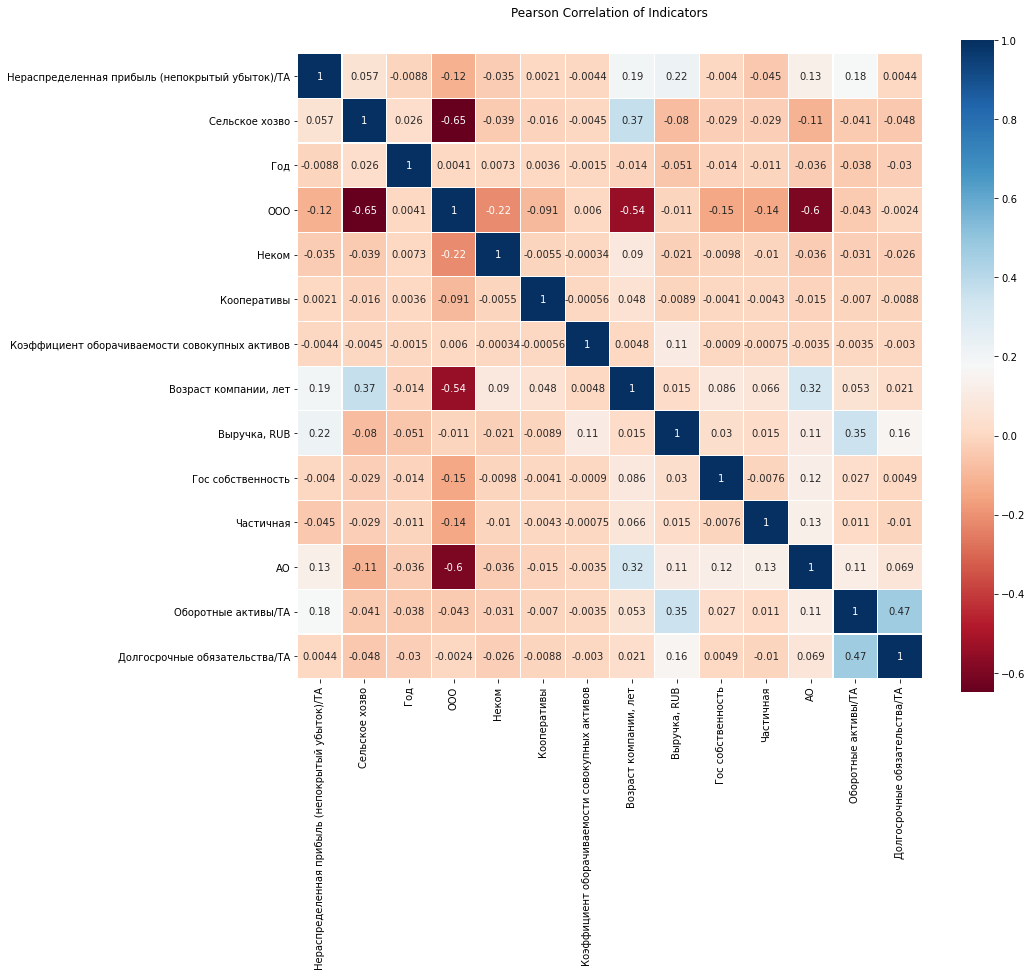

In [16]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Indicators', y=1.05, size=12)
sns.heatmap(data[cols].corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Создаем датасет из списка, содержащего вышеперечисленные переменные

In [17]:
data_final = pd.DataFrame(data_num[cols], columns = cols)

# Часть 2
### Эконометрические модели

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Проведем тест VIF

Начнем с линейно-вероятностной модели. Прогоним на наших данных OLS

In [20]:
X = data_final.copy()

In [21]:
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)


Нераспределенная прибыль (непокрытый убыток)/ТА    1.302277
Сельское хозво                                     2.167627
Год                                                1.079558
ООО                                                3.440485
Неком                                              1.117938
Кооперативы                                        1.024061
Коэффициент оборачиваемости совокупных активов     1.015214
Возраст компании, лет                              5.654016
Выручка, RUB                                       1.410992
Гос собственность                                  1.040321
Частичная                                          1.038421
АО                                                 1.995446
Оборотные активы/ТА                                1.620268
Долгосрочные обязательства/ТА                      1.373669
dtype: float64

Тест гласит, что если VIF коэфф > 5, то данный регрессор значитеньно коррелирует с остальными регрессорами.
Такая проблема возникает только у возраста компании

In [22]:
import statsmodels.api as sm
import statsmodels
OLS_model = sm.OLS(Y,X, M=sm.robust.norms.HuberT())
result = OLS_model.fit()
print(result.summary2())

                                Results: Ordinary least squares
Model:                        OLS                   Adj. R-squared (uncentered):      0.237     
Dependent Variable:           Статус                AIC:                              -1021.5395
Date:                         2021-03-26 11:17      BIC:                              -911.1265 
No. Observations:             19666                 Log-Likelihood:                   524.77    
Df Model:                     14                    F-statistic:                      437.7     
Df Residuals:                 19652                 Prob (F-statistic):               0.00      
R-squared (uncentered):       0.238                 Scale:                            0.055547  
------------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------

Тест Рамсея

In [23]:
print(statsmodels.stats.diagnostic.linear_reset(result))

<Wald test (chi2): statistic=[[767.30574263]], p-value=2.4081027932694825e-167, df_denom=2>


Прогоняем логит на данных cols

In [24]:

Logit_model=sm.Logit(Y,X, M=sm.robust.norms.HuberT())
result=Logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.161720
         Iterations 11
                                         Results: Logit
Model:                          Logit                      Pseudo R-squared:           0.380    
Dependent Variable:             Статус                     AIC:                        6388.7631
Date:                           2021-03-26 11:17           BIC:                        6499.1762
No. Observations:               19666                      Log-Likelihood:             -3180.4  
Df Model:                       13                         LL-Null:                    -5130.1  
Df Residuals:                   19652                      LLR p-value:                0.0000   
Converged:                      1.0000                     Scale:                      1.0000   
No. Iterations:                 11.0000                                                         
-----------------------------------------------------------------

In [25]:
import statsmodels

Проведем тест Breusch-Pagan, проверив гетероскедастичность.

In [26]:
statsmodels.stats.diagnostic.het_breuschpagan(Y, X)

(4674.773155560791, 0.0, 437.7257397961684, 0.0)

Вывело массив размера 4. Расшифровка к коэффициентам: 

1) lm:
The lagrange multiplier statistic.

2) lm_pvalue:
The p-value of lagrange multiplier test.

3) f value:
The f-statistic of the hypothesis that the error variance does not depend on x. This is an alternative test variant not the original LM test.

4) f_pvalue:
The p-value for the f-statistic.

То есть на уровне 1% нет Гетероскедастичности

Построим таблицу с названиями компаний, где столбец "статус" - то фактический статус

In [27]:
predictions = result.predict() 
predictions
df_1 = df[['Наименование', 'Статус']]
df_2 = pd.DataFrame(predictions, columns = ['Вероятность банкротства'])
df_predictions = pd.concat([df_1, df_2], axis = 1)
df_predictions.head(10)

,Наименование,Статус,Вероятность банкротства
0,"(ТУЛАТЕХМАШ), АО",1,0.640644
1,"18 ЦАРЗ, АО",1,0.999580
2,"39 АРСЕНАЛ, АО",1,0.984438
3,"94 АРЗ, АО",1,0.930411
4,"АБСОЛЮТ, ООО",1,0.484478
5,"АВАНГАРД, ООО",1,0.730189
6,"АВГУСТ, ООО",1,0.203824
7,"АВИСТА, ООО",1,0.091766
8,"АВС-КОМПЛЕКТ, ООО",1,0.105404
9,"АВТО-АГРО, ООО",1,0.874195


Чтобы было понятнее, что происходит, отсортируем массив по "вероятности банкротства"

In [28]:
df_predictions.sort_values(by=['Вероятность банкротства'], ).head(10)

,Наименование,Статус,Вероятность банкротства
5413,"ГСВ, ООО",0,0.000000e+00
13033,"ФАНТАЗИЯ, ООО",0,4.380349e-38
17713,"ПЛЕМСЕРВИС, ООО НПФ",0,3.722395e-30
18850,"ПЕРЕКРЕСТОК20, ООО",0,3.722915e-28
4031,"БЬЮТИ ЛАЙФ, ООО",0,1.615552e-22
44,"АГРОХОЛДИНГ ЮРМА, ООО",1,9.020821e-22
16665,"РЕСУРС, ООО",0,1.725766e-21
18860,"ПАРИТЕТ, ООО",0,1.292827e-18
489,"КОРА-ТК, ООО",1,1.752131e-16
89,"АПК КОСМОДЕМЬЯНСКИЙ, АО",1,7.927417e-16


посчитаем точность прогнозов.

Тест Рамсея:

In [29]:
print(statsmodels.stats.diagnostic.linear_reset(result))

Optimization terminated successfully.
         Current function value: 0.155393
         Iterations 15
<Wald test (chi2): statistic=[[236.75833132]], p-value=3.877765849487126e-52, df_denom=2>


Прогоняем пробит на данных cols

In [30]:
Probit_model=sm.Probit(Y,data_final, M=sm.robust.norms.HuberT())
result=Probit_model.fit()
print(result.summary2())

         Current function value: 0.169425
         Iterations: 35
                                        Results: Probit
Model:                          Probit                     Pseudo R-squared:           0.351    
Dependent Variable:             Статус                     AIC:                        6691.8073
Date:                           2021-03-26 11:18           BIC:                        6802.2203
No. Observations:               19666                      Log-Likelihood:             -3331.9  
Df Model:                       13                         LL-Null:                    -5130.1  
Df Residuals:                   19652                      LLR p-value:                0.0000   
Converged:                      0.0000                     Scale:                      1.0000   
No. Iterations:                 35.0000                                                         
------------------------------------------------------------------------------------------------
     

# Часть 3
### Модели машинного обучения

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier

In [32]:
X = data_final

Делим выборку случайным образом на тренировочную и тестовую. Это нужно, чтобы после обучения на тренировочной,
можно было тестировать точность модели на тестовой.

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, stratify = Y, test_size = 0.3)

1) Прогоняем модели k ближайших соседей, смотрим на точность, выбираем наилучший k

In [34]:
train = []
test = []
NN = []

In [35]:
for k in [1, 3, 5, 10, 15, 25]:
    NN.append(k)
    y_predicted_test = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test)
    test.append(np.mean(y_test==y_predicted_test))
    y_predicted_train = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_train)
    train.append(np.mean(y_train==y_predicted_train))

In [36]:
tab = {'NN': NN, 'Train': train , 'Test': test}
tabl = pd.DataFrame(tab, columns = ['NN','Train', 'Test'])
tabl

,NN,Train,Test
0,1,1.000000,0.880678
1,3,0.941305,0.920508
2,5,0.937382,0.931356
3,10,0.935711,0.935763
4,15,0.935566,0.935932
5,25,0.935566,0.935932


Лучше выбрать 10 соседей

2) прогоняем модели: Случайный лес, Логит регрессию, Градиентный бустинг и КНН (k = 15)

In [37]:
import mlxtend
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np   
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [38]:
X_tr = np.array(X_train)
y_tr = np.array(y_train)

In [39]:
train = []
test = []
model = []

In [40]:
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=50)
clf3 =  GradientBoostingClassifier(n_estimators=300)
clf4 = KNeighborsClassifier(n_neighbors = 15)
labels = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'KNN (k = 15)']
for clf, lab in zip([clf1, clf2, clf3, clf4],
                         labels):
    model.append(lab)
    y_predicted_test = clf.fit(X_train, y_train).predict(X_test)
    test.append(np.mean(y_test==y_predicted_test))
    y_predicted_train = clf.fit(X_train, y_train).predict(X_train)
    train.append(np.mean(y_train==y_predicted_train))

In [41]:
tab = {'model': model, 'Train': train , 'Test': test}
tabl = pd.DataFrame(tab, columns = ['model','Train', 'Test'])
tabl

,model,Train,Test
0,Logistic Regression,0.929319,0.929322
1,Random Forest,0.999564,0.980339
2,Gradient Boosting,0.989757,0.977458
3,KNN (k = 15),0.935566,0.935932


Модели, кажется, предсказывают статус очень хорошо, но так как небанкротств значительно больше, чем банкротств,
возникает предположение, что модели хорошо предсказывают только небанкротсва. Посмотрим отдельно на предсказания
каждого из статусов

Это сделаем с помошью confusion matrix и classification report. 
Про confusion matrix читайте тут https://en.wikipedia.org/wiki/Confusion_matrix

Если коротко, то в этих матрицах 2х2 в клетках 11 и 22 верно предсказанные значения, в 12 - ошибочно предсказанные банкротства, в 21 - ошибочные небанкротства

In [42]:
models = [clf1, clf2, clf3, clf4]
for clf, lab in zip(models, labels):
    clf.fit(X_train, y_train)
    print('------------------------'+lab+'------------------------')
    y_train_pred = clf.predict(X_train)
    arg_train = {'y_true':y_train, 'y_pred':y_train_pred}
    print(confusion_matrix(**arg_train))
    print(classification_report(**arg_train)) 

------------------------Logistic Regression------------------------
[[12764     0]
 [  973    29]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12764
           1       1.00      0.03      0.06      1002

    accuracy                           0.93     13766
   macro avg       0.96      0.51      0.51     13766
weighted avg       0.93      0.93      0.90     13766

------------------------Random Forest------------------------
[[12764     0]
 [    6   996]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12764
           1       1.00      0.99      1.00      1002

    accuracy                           1.00     13766
   macro avg       1.00      1.00      1.00     13766
weighted avg       1.00      1.00      1.00     13766

------------------------Gradient Boosting------------------------
[[12764     0]
 [  141   861]]
              precision    recall  f1-score   support

  

На тренировочной выборке отлично работают модели Рандомный лес и Градиентный бустинг. Логит и КНН хорошо предсказывают
небанкротства, с банкротствами ошибаются

Проверим теперь на тестовой выборке

In [58]:
models = [clf1, clf2, clf3, clf4]
for clf, lab in zip(models, labels):
    clf.fit(X_train, y_train)
    print('------------------------'+lab+'------------------------')
    y_test_pred = clf.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}
    print(confusion_matrix(**arg_test))
    print(classification_report(**arg_test)) 

------------------------Logistic Regression------------------------
[[5470    0]
 [ 417   13]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5470
           1       1.00      0.03      0.06       430

    accuracy                           0.93      5900
   macro avg       0.96      0.52      0.51      5900
weighted avg       0.93      0.93      0.90      5900

------------------------Random Forest------------------------
[[5462    8]
 [ 108  322]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5470
           1       0.98      0.75      0.85       430

    accuracy                           0.98      5900
   macro avg       0.98      0.87      0.92      5900
weighted avg       0.98      0.98      0.98      5900

------------------------Gradient Boosting------------------------
[[5444   26]
 [ 107  323]]
              precision    recall  f1-score   support

           0  

Вывод тот же самый. У Рандомного леса и Градиентного бусинга никаких проблем. Эти модели - наилучшие. Рандомный лес предсказывает идеально.

Вывод: рандомный лес - лучшая модель

In [47]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

In [50]:
models = [clf1, clf2, clf3, clf4]
for clf, lab in zip(models, labels):
    clf.fit(X_train, y_train)
    print('------------------------'+lab+'------------------------')
    print(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))
    print(score(clf, X_train, y_train))

------------------------Logistic Regression------------------------
0.7363710923645944


NameError: name 'score' is not defined